## ML - Titanic


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('data.csv')

### Cleanse data

In [2]:
#What data types are we looking at?
data.dtypes

pclass        int64
survived      int64
name         object
sex          object
age          object
sibsp         int64
parch         int64
ticket       object
fare         object
cabin        object
embarked     object
boat         object
body         object
home.dest    object
dtype: object

In [3]:
# Replace all "?" with NaN (Nulls)
data.replace('?', np.nan, inplace = True)

# Convert age and fare to float
data = data.astype({"age": np.float64, "fare": np.float64})

### Plot data

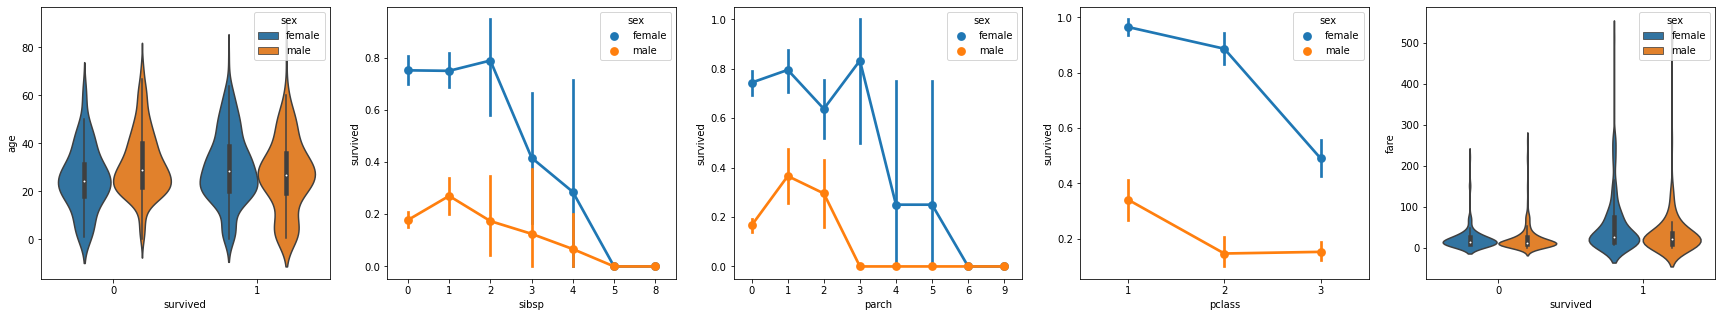

In [4]:
fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [5]:
# Convert gender to bit - this will help with calculating correlations
data.replace({'male': 1, 'female': 0}, inplace=True)

In [6]:
# Analyse correlation of survived with other columns
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


Looking at the correlation results, it seems like the sibsp (sibling or spouse) and parch (parent or children) variables have low correlation to the survived result.
Let's hypothesise that these are related in how they affect survivability and group them into a new column called "relatives"

In [7]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


Drop the sibsp and parch variables, as well as any NA observations.


In [8]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

## Train and evaluate model

Split into test and train data

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

Normalise inputs 

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

For this example, we're using Naive-Bayes as the classification algorithm.
Check out this chart for choosing the best algorithm for your project ![MLMap](ml_map.png)
<h6> Source: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html </h6>

In [13]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [14]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


Looking at metrics, the trained algorithm had a ~75% success rate at estimating survival

## Neural Networks

In [21]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [22]:
# Add layers to network
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 0s 408us/step - loss: 0.6923 - accuracy: 0.5861
Epoch 2/50
27/27 [==============================] - 0s 445us/step - loss: 0.6902 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 408us/step - loss: 0.6874 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 408us/step - loss: 0.6825 - accuracy: 0.5861
Epoch 5/50
27/27 [==============================] - 0s 408us/step - loss: 0.6738 - accuracy: 0.5897
Epoch 6/50
27/27 [==============================] - 0s 445us/step - loss: 0.6594 - accuracy: 0.6734
Epoch 7/50
27/27 [==============================] - 0s 371us/step - loss: 0.6394 - accuracy: 0.7512
Epoch 8/50
27/27 [==============================] - 0s 408us/step - loss: 0.6142 - accuracy: 0.7656
Epoch 9/50
27/27 [==============================] - 0s 408us/step - loss: 0.5854 - accuracy: 0.7691
Epoch 10/50
27/27 [==============================] - 0s 371us/step - loss: 0.5568 - accuracy: 0.7656

In [25]:
y_pred = model.predict_classes(X_test)
print(metrics.accuracy_score(y_test, y_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.784688995215311
